# About

Use a [dataset](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/home) of chest x-rays to detect pneumonia.

# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load fastai libraries
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# verify GPU
print(torch.cuda.is_available(), torch.backends.cudnn.enabled)

True True


# Inspect data

In [4]:
PATH = '../data/chest_xray'
os.listdir(PATH)

['tmp', 'valid', 'models', 'train', '.DS_Store', 'test']

In [5]:
files = os.listdir(f'{PATH}/train/PNEUMONIA')[0:5]
files

['person1290_bacteria_3253.jpeg',
 'person973_virus_1647.jpeg',
 'person1344_bacteria_3421.jpeg',
 'person481_bacteria_2041.jpeg',
 'person392_bacteria_1783.jpeg']

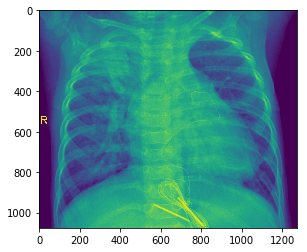

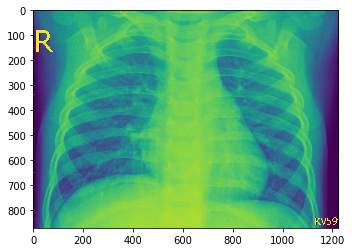

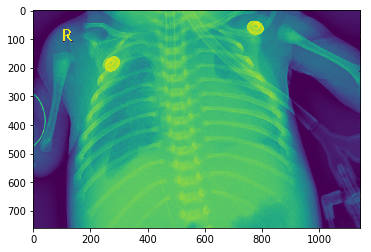

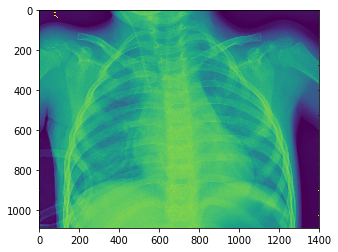

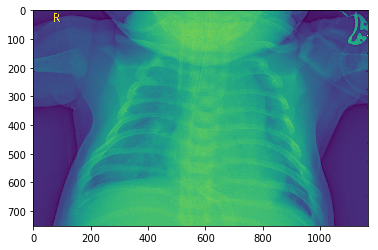

In [6]:
def load_img_id(idx):
    img = plt.imread(f'{PATH}/train/PNEUMONIA/{files[idx]}')
    return img

idxs = range(5)
imgs = [load_img_id(x) for x in idxs]

for img in imgs:
    plt.figure()
    plt.imshow(img)

In [7]:
files = os.listdir(f'{PATH}/train/NORMAL')[0:5]
files

['NORMAL2-IM-1018-0001.jpeg',
 'NORMAL2-IM-0583-0001.jpeg',
 'NORMAL2-IM-0838-0001.jpeg',
 'NORMAL2-IM-0595-0001.jpeg',
 'NORMAL2-IM-0977-0001.jpeg']

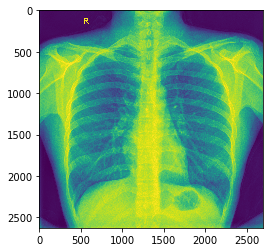

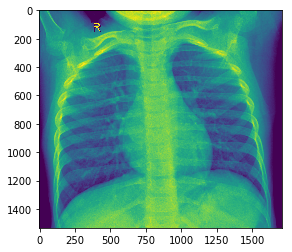

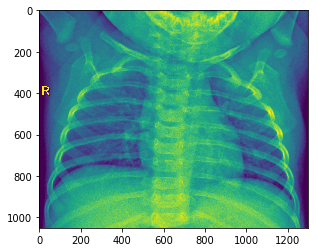

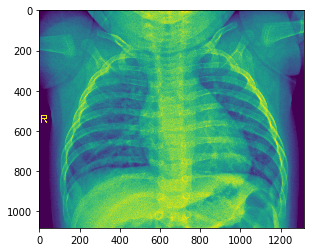

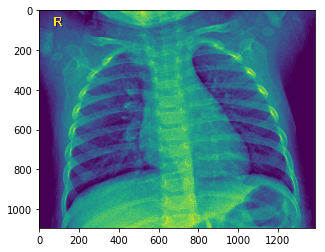

In [8]:
def load_img_id(idx):
    img = plt.imread(f'{PATH}/train/NORMAL/{files[idx]}')
    return img

idxs = range(5)
imgs = [load_img_id(x) for x in idxs]

for img in imgs:
    plt.figure()
    plt.imshow(img)

# Model

In [9]:
arch = resnet34
sz = 64

In [10]:
def get_data(sz):
    tfms = tfms_from_model(arch, sz)
    return ImageClassifierData.from_paths(PATH, tfms=tfms)

In [11]:
data = get_data(sz)

In [12]:
data = data.resize(int(sz*1.3), 'tmp')

In [13]:
# run learner with precompute enabled
learn = ConvLearner.pretrained(arch, data, precompute=True)

 60%|█████▉    | 49/82 [00:01<00:21,  1.51it/s, loss=0.572]


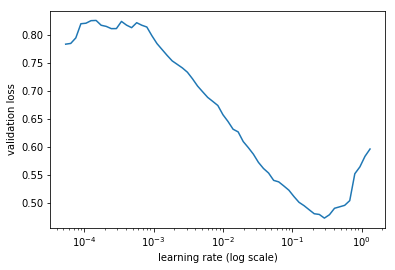

In [14]:
# find optimal learning rate
lrf = learn.lr_find()
learn.sched.plot()

In [15]:
lr = 0.08

In [16]:
learn.fit(lr, 5)

epoch      trn_loss   val_loss   accuracy                  
    0      0.353655   1.282873   0.6875    
    1      0.268675   1.310183   0.5625                    
    2      0.221493   1.676798   0.625                     
    3      0.206782   1.495106   0.5625                    
    4      0.16686    0.801308   0.625                     



[array([0.80131]), 0.625]

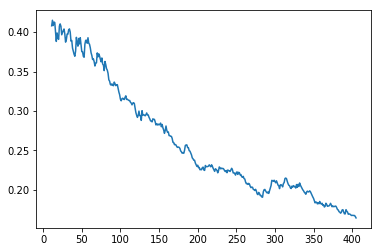

In [17]:
learn.sched.plot_loss()

In [18]:
#learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)
#learn.fit(lr, 5)

In [19]:
learn.precompute=False
learn.unfreeze()
lr = np.array([lr/9, lr/3, lr])

In [20]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.156327   0.869283   0.625     
    1      0.101468   0.467478   0.75                      
    2      0.069139   0.776209   0.75                       
    3      0.077702   0.25476    0.9375                     
    4      0.055648   0.505866   0.875                      
    5      0.038638   0.396324   0.875                      
    6      0.03269    0.470861   0.875                      



[array([0.47086]), 0.875]

In [21]:
learn.save(f'{sz}')

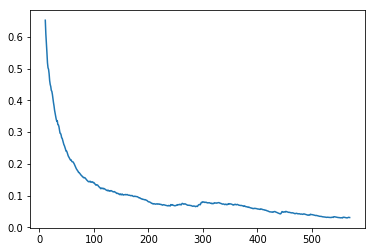

In [22]:
learn.sched.plot_loss()

In [23]:
sz=128

In [24]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.177178   0.631911   0.625     
    1      0.176559   0.685203   0.8125                    
    2      0.149375   0.53454    0.75                      
    3      0.151861   0.563363   0.8125                    
    4      0.143226   0.579952   0.75                      
    5      0.131175   0.492192   0.75                      
    6      0.123894   0.550588   0.625                     



[array([0.55059]), 0.625]

In [26]:
learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   accuracy                  
    0      0.106662   0.541918   0.8125    
    1      0.076181   0.514632   0.8125                     
    2      0.049502   0.892813   0.6875                     
    3      0.058235   0.274176   0.875                      
    4      0.039009   0.422991   0.875                      
    5      0.026103   0.753987   0.625                      
    6      0.021162   0.570596   0.875                      



In [27]:
sz=256

In [28]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.193236   1.1339     0.625     
    1      0.176538   1.16803    0.6875                    
    2      0.131235   0.978556   0.6875                    
    3      0.12963    1.11185    0.6875                    
    4      0.122051   0.990964   0.75                      
    5      0.11223    0.784997   0.75                      
    6      0.109542   0.922903   0.6875                    



[array([0.9229]), 0.6875]

In [29]:
learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   accuracy                   
    0      0.083904   0.600501   0.75      
    1      0.072067   0.268841   0.8125                     
    2      0.04787    0.386898   0.75                       
    3      0.037696   0.577956   0.875                      
    4      0.035267   0.142109   0.9375                     
    5      0.020982   0.196225   0.875                      
    6      0.017153   0.100254   0.9375                     



In [30]:
# add test time augmentation
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [31]:
# get accuracy
accuracy_np(probs, y)

0.875

[[6 2]
 [0 8]]


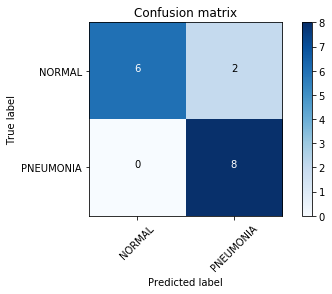

In [32]:
# display confusion matrix
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

#classes = np.unique(Y_train)
plot_confusion_matrix(cm, data.classes)

### show incorrect predictions

In [33]:
# define helper functions
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+'/'+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

In [34]:
# count incorrect predictions
incorrect_predictions = np.where(preds != y)[0]
len(incorrect_predictions)

2

In [35]:
# visualize incorrect predictions
plot_val_with_title(incorrect_predictions, "Incorrect predictions (prediction, label)")

Incorrect predictions (prediction, label)


ValueError: axes don't match array